In [1]:
import sqlite3
import pandas as pd
from pandas import DataFrame, Series
import urllib
from datetime import date
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
urllib.urlretrieve("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt", 
                   "D:\master\Master-in-Data-Science\Proyecto\Datos\co2_weekly_mlo.txt")

('D:\\master\\Master-in-Data-Science\\Proyecto\\Datos\\co2_weekly_mlo.txt',
 <mimetools.Message instance at 0x0000000008927448>)

In [3]:
file = open("D:\master\Master-in-Data-Science\Proyecto\Datos\co2_weekly_mlo.txt","r")

In [4]:
# Las primeras lineas del fichero contiene una serie de líneas de comentarios, se eliminan
df_co2 = DataFrame()
for line in file:
    if line[0] != "#":
        line = " ".join(line.split())        
        elements = line.split(" ")
        fecha = date(int(elements[0]),int(elements[1]),int(elements[2]))
        level = float(elements[4])
        if level > 0:
            df_co2 = df_co2.append([{"date":fecha,"c02_level":level}])


In [5]:
file.close()

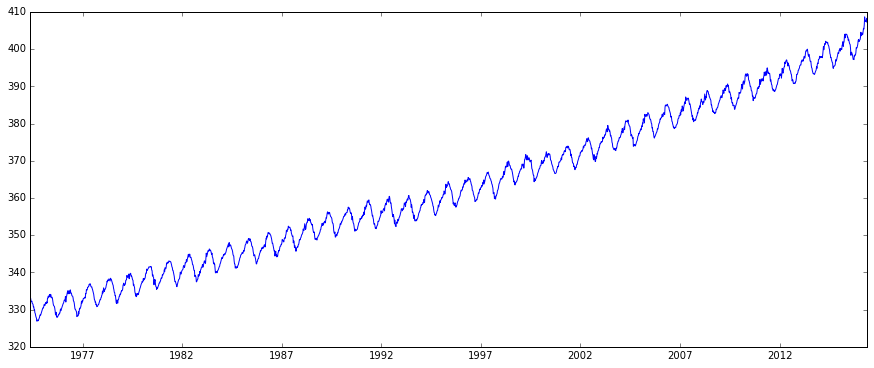

In [6]:
df_co2 = df_co2.set_index("date")
plt.plot(df_co2)